# Automated tune-up for single qubit

## Load the environment

In [1]:
from simulated_setup import * # Change to your customized setup file
from leeq.experiments.builtin import *

## Initialize qubits configuration

[2024-12-08 15:57:22] [INFO] [labchronicle.chronicle] Log started at log/zijian/2024-12/2024-12-08/15.57.22
[2024-12-08 15:57:22] [INFO] [labchronicle.chronicle] Log started at log/zijian/2024-12/2024-12-08/15.57.22


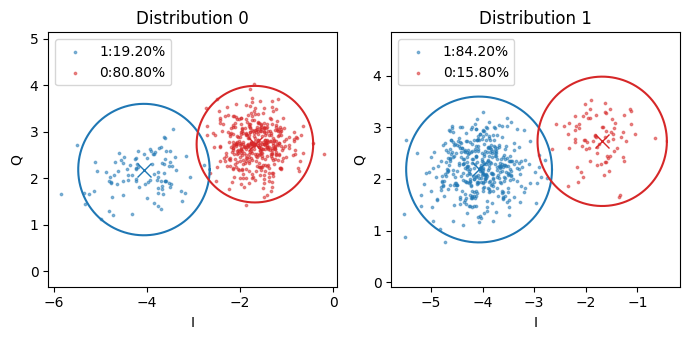

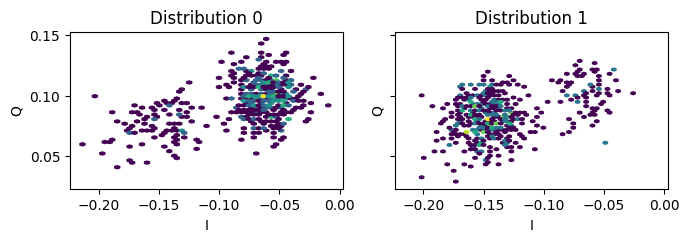

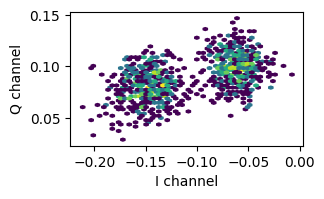

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

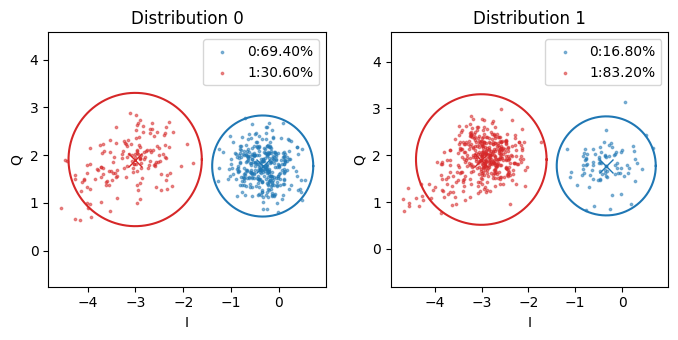

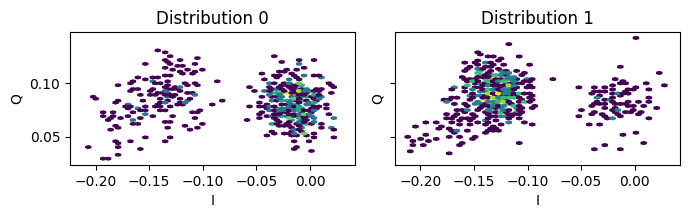

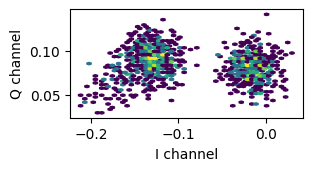

<IPython.core.display.JSON object>

<IPython.core.display.JSON object>

In [2]:
simulation_setup()

# setup().start_live_monitor() # When needed you can setup the live monitor.
setup().status().set_param("Shot_Number", 500)
setup().status().set_param("Shot_Period", 500)                              
  
dut_dict = {
    'Q1': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_a},
    'Q2': {'Active': True, 'Tuneup': False,'FromLog':False, 'Params': configuration_b}
} 

duts_dict = {}
for hrid, dd in dut_dict.items():
    if (dd['Active']):
        if (dd['FromLog']):
            dut = TransmonElement.load_from_calibration_log(dd['Params']['hrid'])
        else:
            dut = TransmonElement(name=dd['Params']['hrid'],parameters=dd['Params'])
            
        if (dd['Tuneup']):
            dut.save_calibration_log()
        else:
            lpb_scan = (dut.get_c1('f01')['I'], dut.get_c1('f01')['X'])
            calib = MeasurementCalibrationMultilevelGMM(dut, mprim_index=0,sweep_lpb_list=lpb_scan)
        dut.print_config_info()
        duts_dict[hrid] = dut

## Run auto tuneup

Adding experiment to memory:   0%|          | 0/17 [00:00<?, ?it/s]

generate_agent_from_procedure:   0%|          | 0/5 [00:00<?, ?it/s]

extract_parameters:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

extract_parameters:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

extract_parameters:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Sampling noise is enabled


<IPython.core.display.JSON object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Sampling noise is enabled


<IPython.core.display.JSON object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Sampling noise is enabled


<IPython.core.display.JSON object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

extract_parameters:   0%|          | 0/2 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

Amplitude updated: 0.5489810209703299


<IPython.core.display.JSON object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

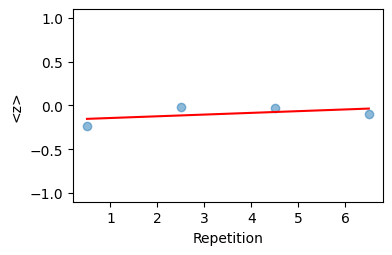

<IPython.core.display.JSON object>

Estimated best amplitude 0.552+/-0.004


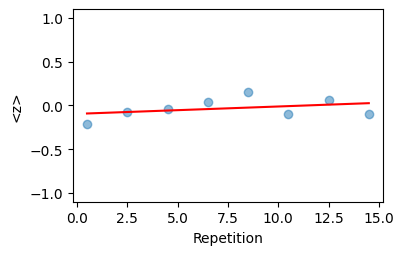

<IPython.core.display.JSON object>

Estimated best amplitude 0.5539+/-0.0015


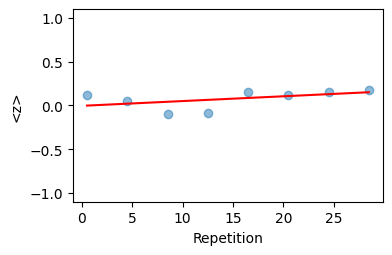

<IPython.core.display.JSON object>

Estimated best amplitude 0.5548+/-0.0007


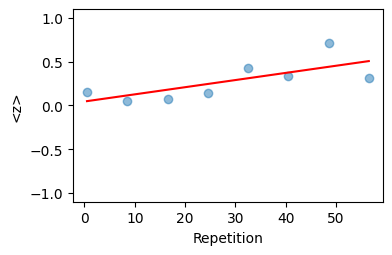

<IPython.core.display.JSON object>

Estimated best amplitude 0.5563+/-0.0006


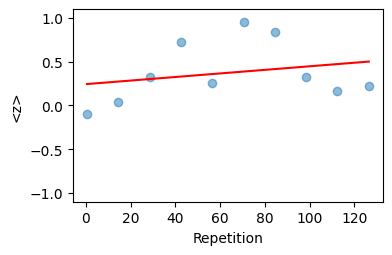

<IPython.core.display.JSON object>

Estimated best amplitude 0.5566+/-0.0005


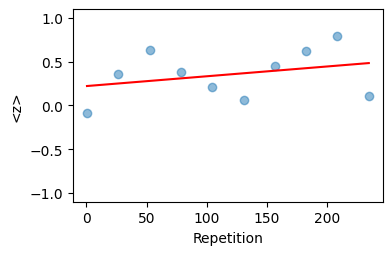

<IPython.core.display.JSON object>

Estimated best amplitude 0.55685+/-0.00021


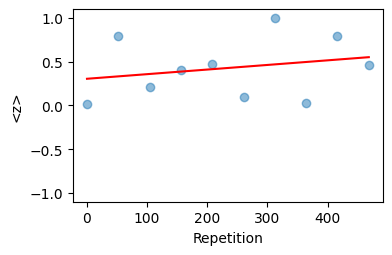

<IPython.core.display.JSON object>

Estimated best amplitude 0.55694+/-0.00013


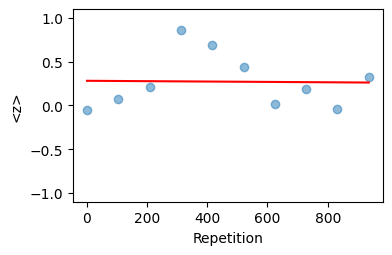

<IPython.core.display.JSON object>

Estimated best amplitude 0.55693+/-0.00006


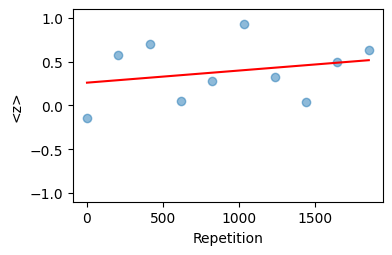

<IPython.core.display.JSON object>

Estimated best amplitude 0.556959+/-0.000033


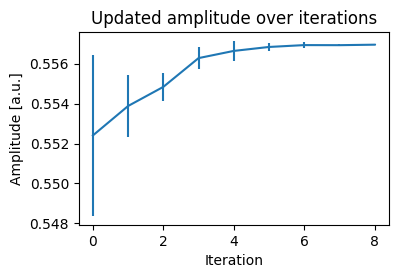

<IPython.core.display.JSON object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recalling:   0%|          | 0/3 [00:00<?, ?it/s]

No code suggestion found. Recall more agents.


Recalling:   0%|          | 0/5 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

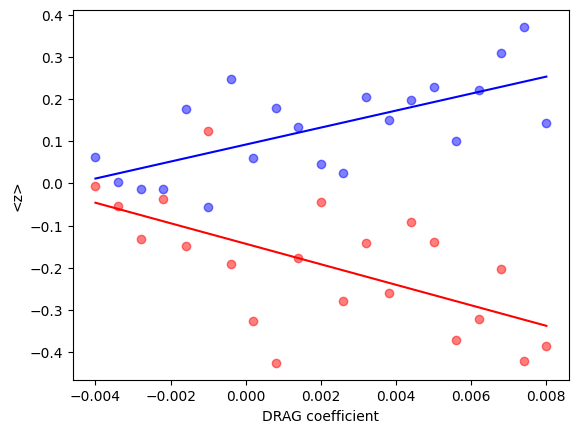

<IPython.core.display.JSON object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from k_agents.execution.agent import execute_procedure
from leeq.utils.ai.translation_agent import init_leeq_translation_agents

from mllm.config import default_models
default_models.normal = "gpt-4o"
default_models.expensive = "gpt-4o"
setup().status().set_param("AIAutoInspectPlots", True)     

init_leeq_translation_agents()
execute_procedure("Full gate calibration on `dut`", dut=duts_dict['Q1'])